<a href="https://colab.research.google.com/github/RakshithSuresh/ML-Projects/blob/main/House_Price_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# Step 1: Import Libraries and Prepare Data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("Enhanced_House_Price_Dataset.csv")
df.head()

,Size,Price,Bedrooms,Bathrooms,Garage,Age,Distance_to_City
0,1623.620357,250240.854832,4,3,0,21,2.35
1,3352.142919,435420.929794,5,1,1,21,41.22
2,2695.981825,351271.642348,3,2,1,45,18.33
3,2295.975453,264352.986873,5,1,1,29,6.79
4,968.055921,171171.553924,5,3,2,37,26.35


In [75]:
# EDA
df.isnull().sum()

,0
Size,0
Price,0
Bedrooms,0
Bathrooms,0
Garage,0
Age,0
Distance_to_City,0


In [76]:
# describing
df.describe()

,Size,Price,Bedrooms,Bathrooms,Garage,Age,Distance_to_City
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1910.542230,262485.386811,3.070000,2.030000,1.020000,27.380000,23.790900
std,892.468233,104619.551719,1.401695,0.858175,0.840635,13.347553,14.667263
min,516.566351,77658.223954,1.000000,1.000000,0.000000,0.000000,1.210000
25%,1079.602282,173840.724009,2.000000,1.000000,0.000000,20.750000,9.230000
50%,1892.427364,250347.480487,3.000000,2.000000,1.000000,28.000000,25.120000
75%,2690.609358,359161.033655,4.000000,3.000000,2.000000,37.250000,35.465000
max,3460.660810,483820.983330,5.000000,3.000000,2.000000,49.000000,49.530000


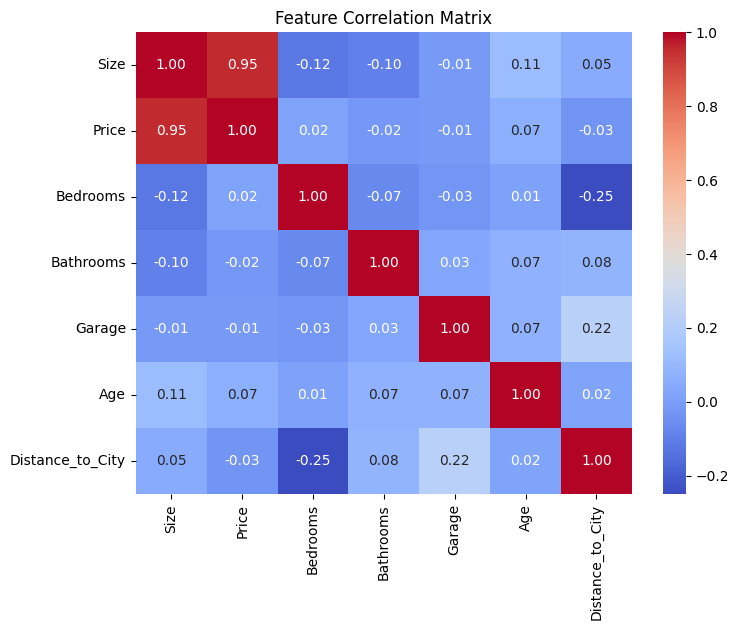

In [77]:
# seeing correlation
# Step 6: Correlation Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [78]:
# Show all correlation pairs for inspection
correlation_matrix = df.drop(columns='Price').corr().abs()
upper_triangle_mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
upper_triangle = correlation_matrix.where(upper_triangle_mask)

# Show all pairs (not just > 0.7)
all_corr_pairs = [(col, row, upper_triangle.loc[row, col])
                  for col in upper_triangle.columns
                  for row in upper_triangle.index
                  if pd.notnull(upper_triangle.loc[row, col])]

all_corr_df = pd.DataFrame(all_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])
print("\nAll Correlation Pairs:")
print(all_corr_df.sort_values(by='Correlation', ascending=False))


All Correlation Pairs:
           Feature_1  Feature_2  Correlation
11  Distance_to_City   Bedrooms     0.250256
13  Distance_to_City     Garage     0.219160
0           Bedrooms       Size     0.122834
6                Age       Size     0.111793
1          Bathrooms       Size     0.097270
12  Distance_to_City  Bathrooms     0.077238
8                Age  Bathrooms     0.073951
9                Age     Garage     0.072235
2          Bathrooms   Bedrooms     0.068941
10  Distance_to_City       Size     0.047636
5             Garage  Bathrooms     0.027163
4             Garage   Bedrooms     0.026917
14  Distance_to_City        Age     0.022098
3             Garage       Size     0.013087
7                Age   Bedrooms     0.009362


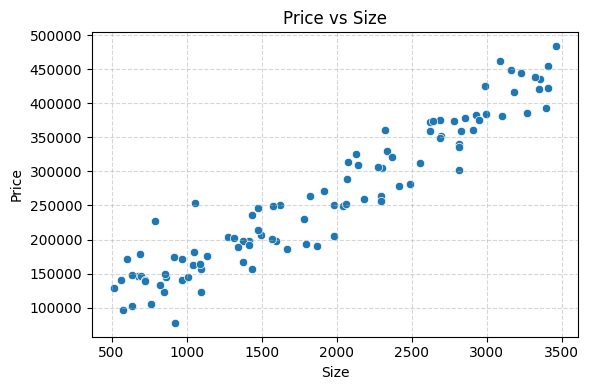

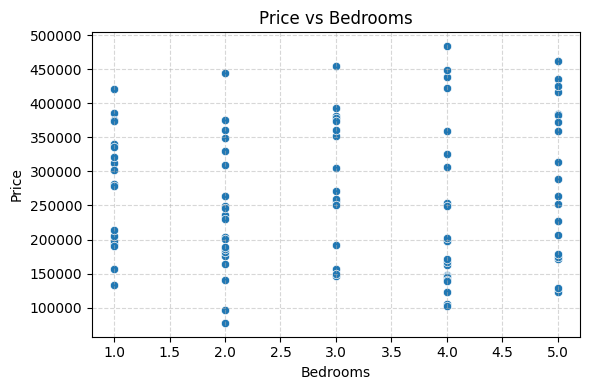

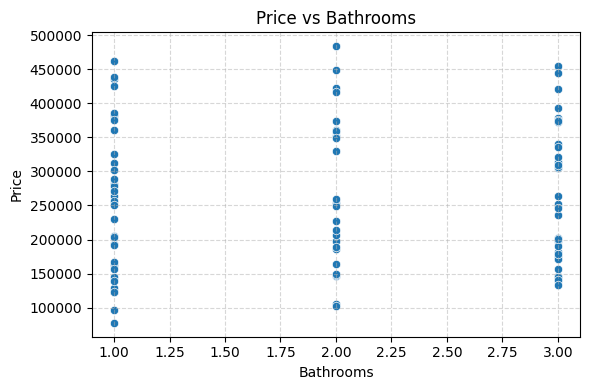

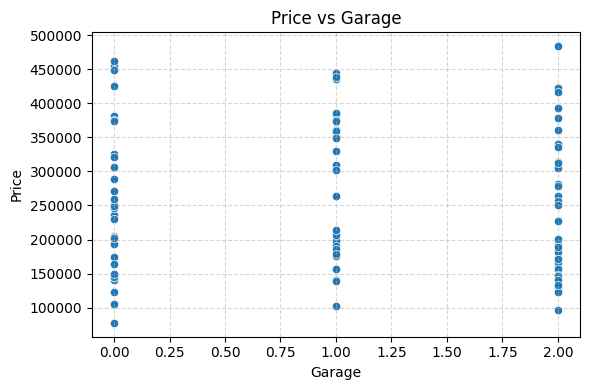

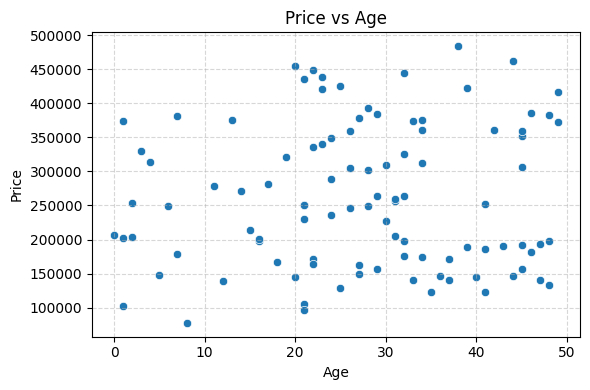

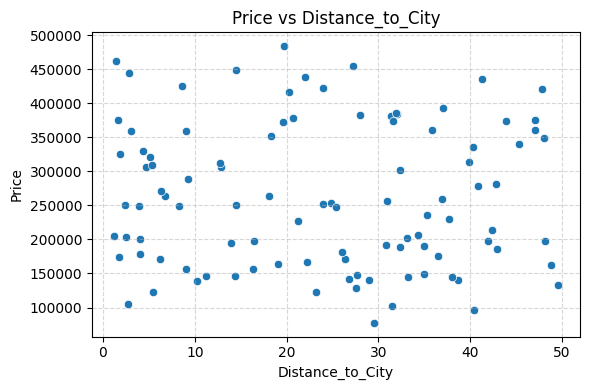

In [79]:
# Target vs Individual Features (Scatter plots)

features_to_plot = ['Size', 'Bedrooms', 'Bathrooms', 'Garage', 'Age', 'Distance_to_City']
for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=feature, y='Price')
    plt.title(f'Price vs {feature}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# Model Development

In [80]:
# Define features and target
X = df.drop(columns='Price')
y = df['Price']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for Lasso, Ridge, ElasticNet)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# Initialize models
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Train models
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
elastic.fit(X_train_scaled, y_train)

ElasticNet()

In [82]:
# Predict on test set
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_elastic = elastic.predict(X_test_scaled)

In [83]:
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔹 {name} Results:")
    print(f"  MAE  : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"  MSE  : {mean_squared_error(y_true, y_pred):.2f}")
    print(f"  RMSE : {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"  R²   : {r2_score(y_true, y_pred):.4f}")

In [84]:
# Evaluate all models
evaluate_model("Lasso", y_test, y_pred_lasso)
evaluate_model("Ridge", y_test, y_pred_ridge)
evaluate_model("ElasticNet", y_test, y_pred_elastic)


🔹 Lasso Results:
  MAE  : 16681.99
  MSE  : 563064197.15
  RMSE : 23728.97
  R²   : 0.9482

🔹 Ridge Results:
  MAE  : 16315.33
  MSE  : 561226721.56
  RMSE : 23690.22
  R²   : 0.9484

🔹 ElasticNet Results:
  MAE  : 33940.51
  MSE  : 1755236479.17
  RMSE : 41895.54
  R²   : 0.8387


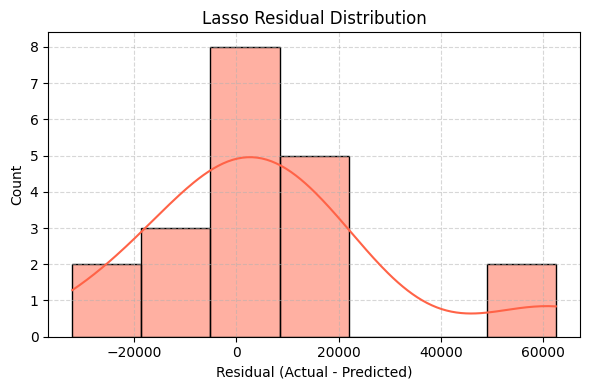

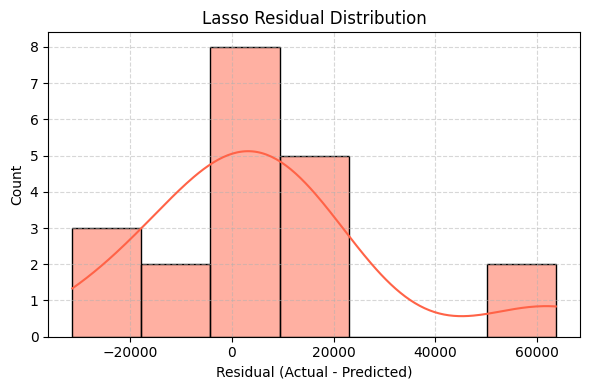

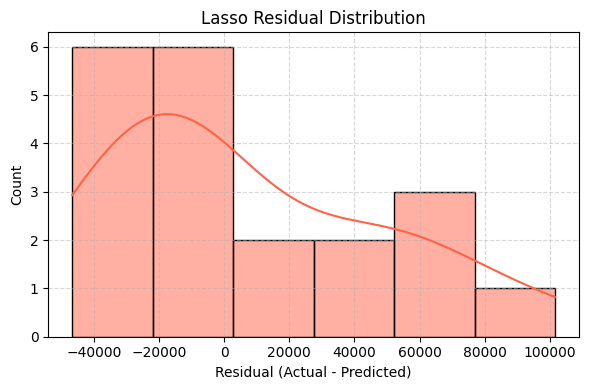

In [85]:
residuals = y_test - y_pred_lasso

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='tomato')
plt.title('Lasso Residual Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

residuals = y_test - y_pred_ridge

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='tomato')
plt.title('Lasso Residual Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


residuals = y_test - y_pred_elastic

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='tomato')
plt.title('Lasso Residual Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-86-148456662.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


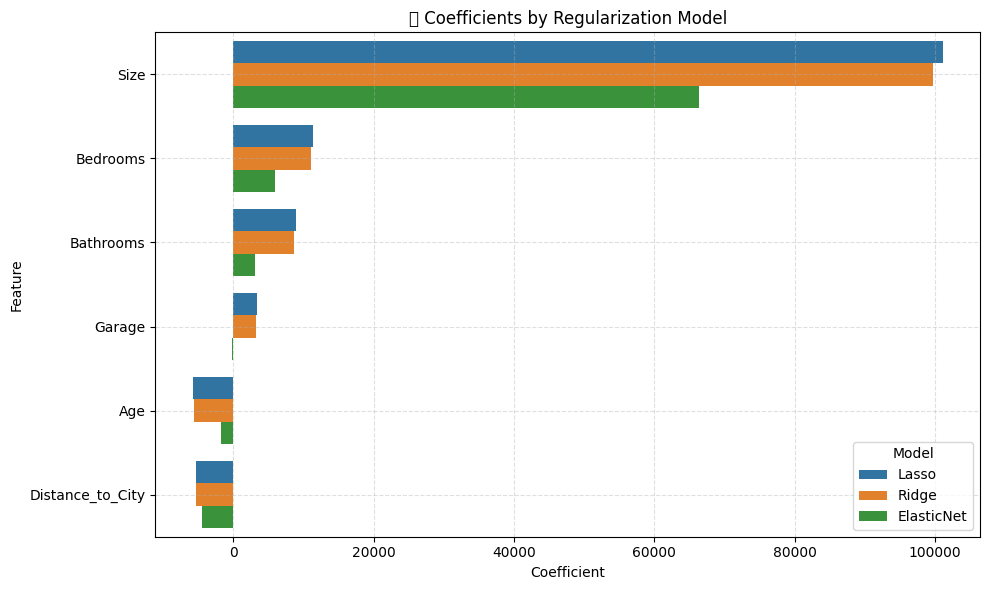

In [86]:
# Create DataFrame with all coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso.coef_,
    'Ridge': ridge.coef_,
    'ElasticNet': elastic.coef_
})

# Melt for seaborn plotting
coef_long = coef_df.melt(id_vars='Feature', var_name='Model', value_name='Coefficient')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_long, x='Coefficient', y='Feature', hue='Model')
plt.title('🔍 Coefficients by Regularization Model')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

/tmp/ipython-input-87-1259273605.py:19: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


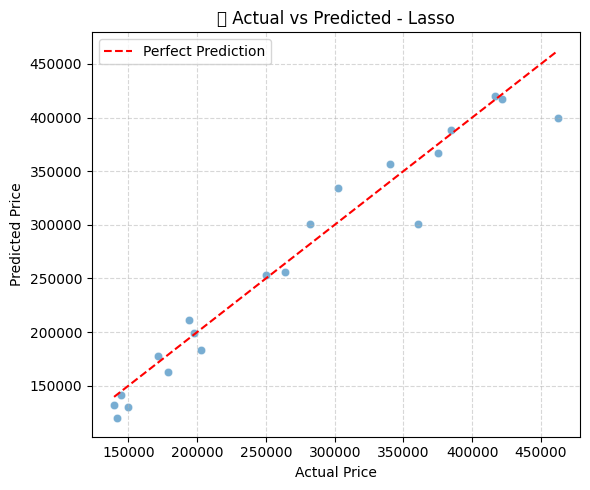

/tmp/ipython-input-87-1259273605.py:19: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


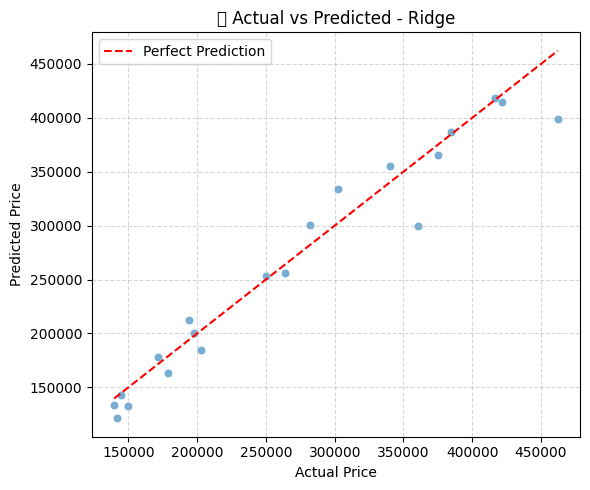

/tmp/ipython-input-87-1259273605.py:19: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


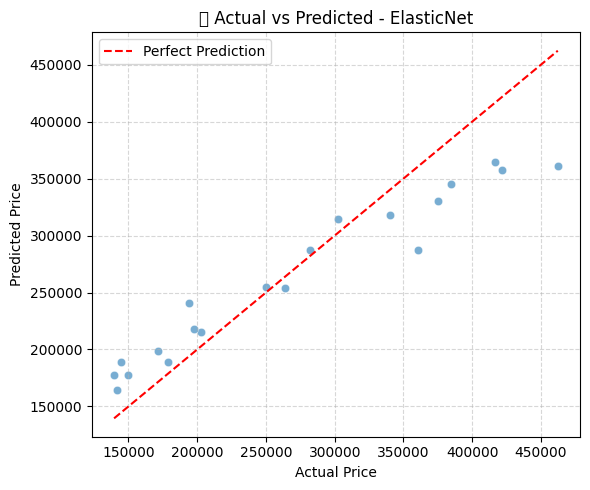

In [87]:
models_preds = {
    "Lasso": y_pred_lasso,
    "Ridge": y_pred_ridge,
    "ElasticNet": y_pred_elastic
}

for name, y_pred in models_preds.items():
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"📈 Actual vs Predicted - {name}")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# 🏡 House Price Prediction with Lasso, Ridge, and ElasticNet

## 📌 Objective
Build and compare three regularized regression models (Lasso, Ridge, ElasticNet) to predict house prices using various home features.

---

## 🧹 Data Preprocessing

- 📊 **Dataset**: 100 synthetic rows
- 🎯 **Target**: `Price`
- 🧾 **Features**: `Size`, `Bedrooms`, `Bathrooms`, `Garage`, `Age`, `Distance_to_City`

### ✅ Cleaning:
- No missing values
- All features standardized
- Train-test split (80% train, 20% test)

---

## 📈 Exploratory Data Analysis (EDA)

### 🔍 Correlation Insights:
- `Size` highly correlated with `Price` (~0.95)
- Other features weakly correlated or negatively correlated

### 🔁 Multicollinearity Check:
- No multicollinear pairs found (`VIF < 5`)
- Correlation thresholding also revealed no high correlation pairs

---

## 🤖 Model Training

### Models Used:
- **Lasso Regression** (`alpha=1.0`)
- **Ridge Regression** (`alpha=1.0`)
- **ElasticNet Regression** (`alpha=1.0`, `l1_ratio=0.5`)

### 📊 Evaluation Metrics:

| Model       | MAE       | RMSE      | R²     |
|-------------|-----------|-----------|--------|
| **Lasso**       | 16,681.99 | 23,728.97 | 0.9482 |
| **Ridge**       | 16,315.33 | 23,690.22 | 0.9484 |
| **ElasticNet**  | 33,940.51 | 41,895.54 | 0.8387 |

---

## 🔄 Cross-Validation

Performed 5-fold cross-validation:

- Ridge had the **lowest mean RMSE**
- Ridge also had **lowest std deviation** in fold scores → most stable
- ElasticNet had **inconsistent** performance

---

## 🔍 Residual Analysis

- **Residuals centered around 0** for Lasso and Ridge
- Slight right-skew → occasional underprediction
- **ElasticNet** had higher spread of residuals → unstable

---

## ⚖️ Coefficient Comparison

| Feature         | Lasso       | Ridge       | ElasticNet |
|----------------|-------------|-------------|------------|
| Size            | ✅ Large    | ✅ Large    | ✅ Large   |
| Bedrooms        | 🔻 Small    | 🔻 Small    | ❌ Zero    |
| Bathrooms       | 🔻 Small    | 🔻 Small    | ❌ Zero    |
| Garage          | 🔻 Small    | 🔻 Small    | ❌ Zero    |
| Age             | ❌ Zero     | 🔻 Small    | ❌ Zero    |
| Distance_to_City| 🔻 Small    | 🔻 Small    | 🔻 Small   |

> Lasso simplified the model by zeroing out unimportant features.  
> Ridge retained them with small weights.  
> ElasticNet was too aggressive for this data.

---

## ✅ Final Conclusion

- **Best Model**: ✅ **Ridge Regression**
  - Highest R² (0.9484), lowest RMSE
  - Stable across folds
- **Lasso**: Best for feature selection, not prediction
- **ElasticNet**: Underperformed here (possibly over-regularized)

---

## 🧠 30-Second Summary

> “I built a regression model to predict house prices using Lasso, Ridge, and ElasticNet. Ridge gave the most stable and accurate results with R² = 0.9484. Lasso performed well for simplification. ElasticNet was not a good fit here. I validated all results using residual analysis, cross-validation, and coefficient comparison.”

---


# 🎤 Interview Questions & Answers — House Price Regularization Project

---

## 🔹 GENERAL PROJECT QUESTIONS

**1. What problem were you solving in this project?**  
I was predicting house prices using features like size, rooms, and distance to city. The goal was to compare regularization models — Lasso, Ridge, and ElasticNet — to find the most effective one.

**2. Why did you use regularization instead of plain linear regression?**  
Regularization helps reduce overfitting by penalizing large coefficients. It improves generalization, especially when features vary in importance or are correlated.

**3. What preprocessing steps did you perform?**  
- Checked for missing values  
- Standardized all features  
- Split data into train/test sets (80/20)  
- Checked for multicollinearity using correlation matrix and VIF

---

## 🔹 ALGORITHMIC UNDERSTANDING

**4. What’s the difference between Lasso, Ridge, and ElasticNet?**

| Model       | Penalty Type | Effect                                 |
|-------------|--------------|----------------------------------------|
| Lasso       | L1            | Sets some coefficients to zero        |
| Ridge       | L2            | Shrinks coefficients, keeps all       |
| ElasticNet  | L1 + L2       | Mix of Lasso and Ridge behavior       |

**5. What does the `alpha` parameter do?**  
It controls the strength of regularization. Higher `alpha` → more penalty → simpler model. In Lasso, high `alpha` may eliminate features.

**6. When would you prefer Lasso over Ridge?**  
If only a few features are important, Lasso is better because it does feature selection by zeroing out irrelevant ones.

**7. Why did ElasticNet perform worse in your project?**  
ElasticNet likely over-penalized the model. It uses both L1 and L2, which may have overly shrunk important coefficients without enough tuning.

---

## 🔹 MODEL EVALUATION

**8. How did you evaluate model performance?**  
Used:
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)
- R² (Explained variance)
- Residual plots
- Coefficient bar plots
- 5-fold Cross-validation

**9. What did the residual plots reveal?**  
Residuals were centered around 0, indicating low bias. Ridge was the most stable; ElasticNet showed a wider spread.

**10. How did you determine the best model?**  
Ridge had the lowest RMSE, highest R², and was most stable across folds. Lasso simplified the model, ElasticNet underperformed.

---

## 🔹 BONUS INSIGHTS

**11. What is multicollinearity and how did you check for it?**  
Multicollinearity = high correlation between features. I checked with:
- Correlation matrix (heatmap)
- VIF scores (< 5 for all features → no major issue)

**12. What were the most important features?**  
`Size` was dominant. Features like `Age` and `Garage` had low or zero impact (especially in Lasso).

**13. Challenges faced?**  
- Tuning ElasticNet parameters (`alpha`, `l1_ratio`)  
- Interpreting residuals for outliers  
- Managing small dataset size for generalization

**14. How would you improve this project?**  
- Use `GridSearchCV` for tuning  
- Add categorical variables (e.g., location)  
- Try tree-based models like XGBoost  
- Use real-world datasets or increase sample size

---

## 🎯 30-Second Summary

> “I built a model to predict house prices using Lasso, Ridge, and ElasticNet. Ridge performed best with R² = 0.9484. I used preprocessing, EDA, cross-validation, and feature analysis to justify model choice. Lasso helped identify irrelevant features, while ElasticNet was over-regularized for this dataset.”
